<a href="https://colab.research.google.com/github/karinaah/NLP-inicios/blob/main/Clustering_y_modelos_Clasificacion_oficial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Esquema Modelo AML**

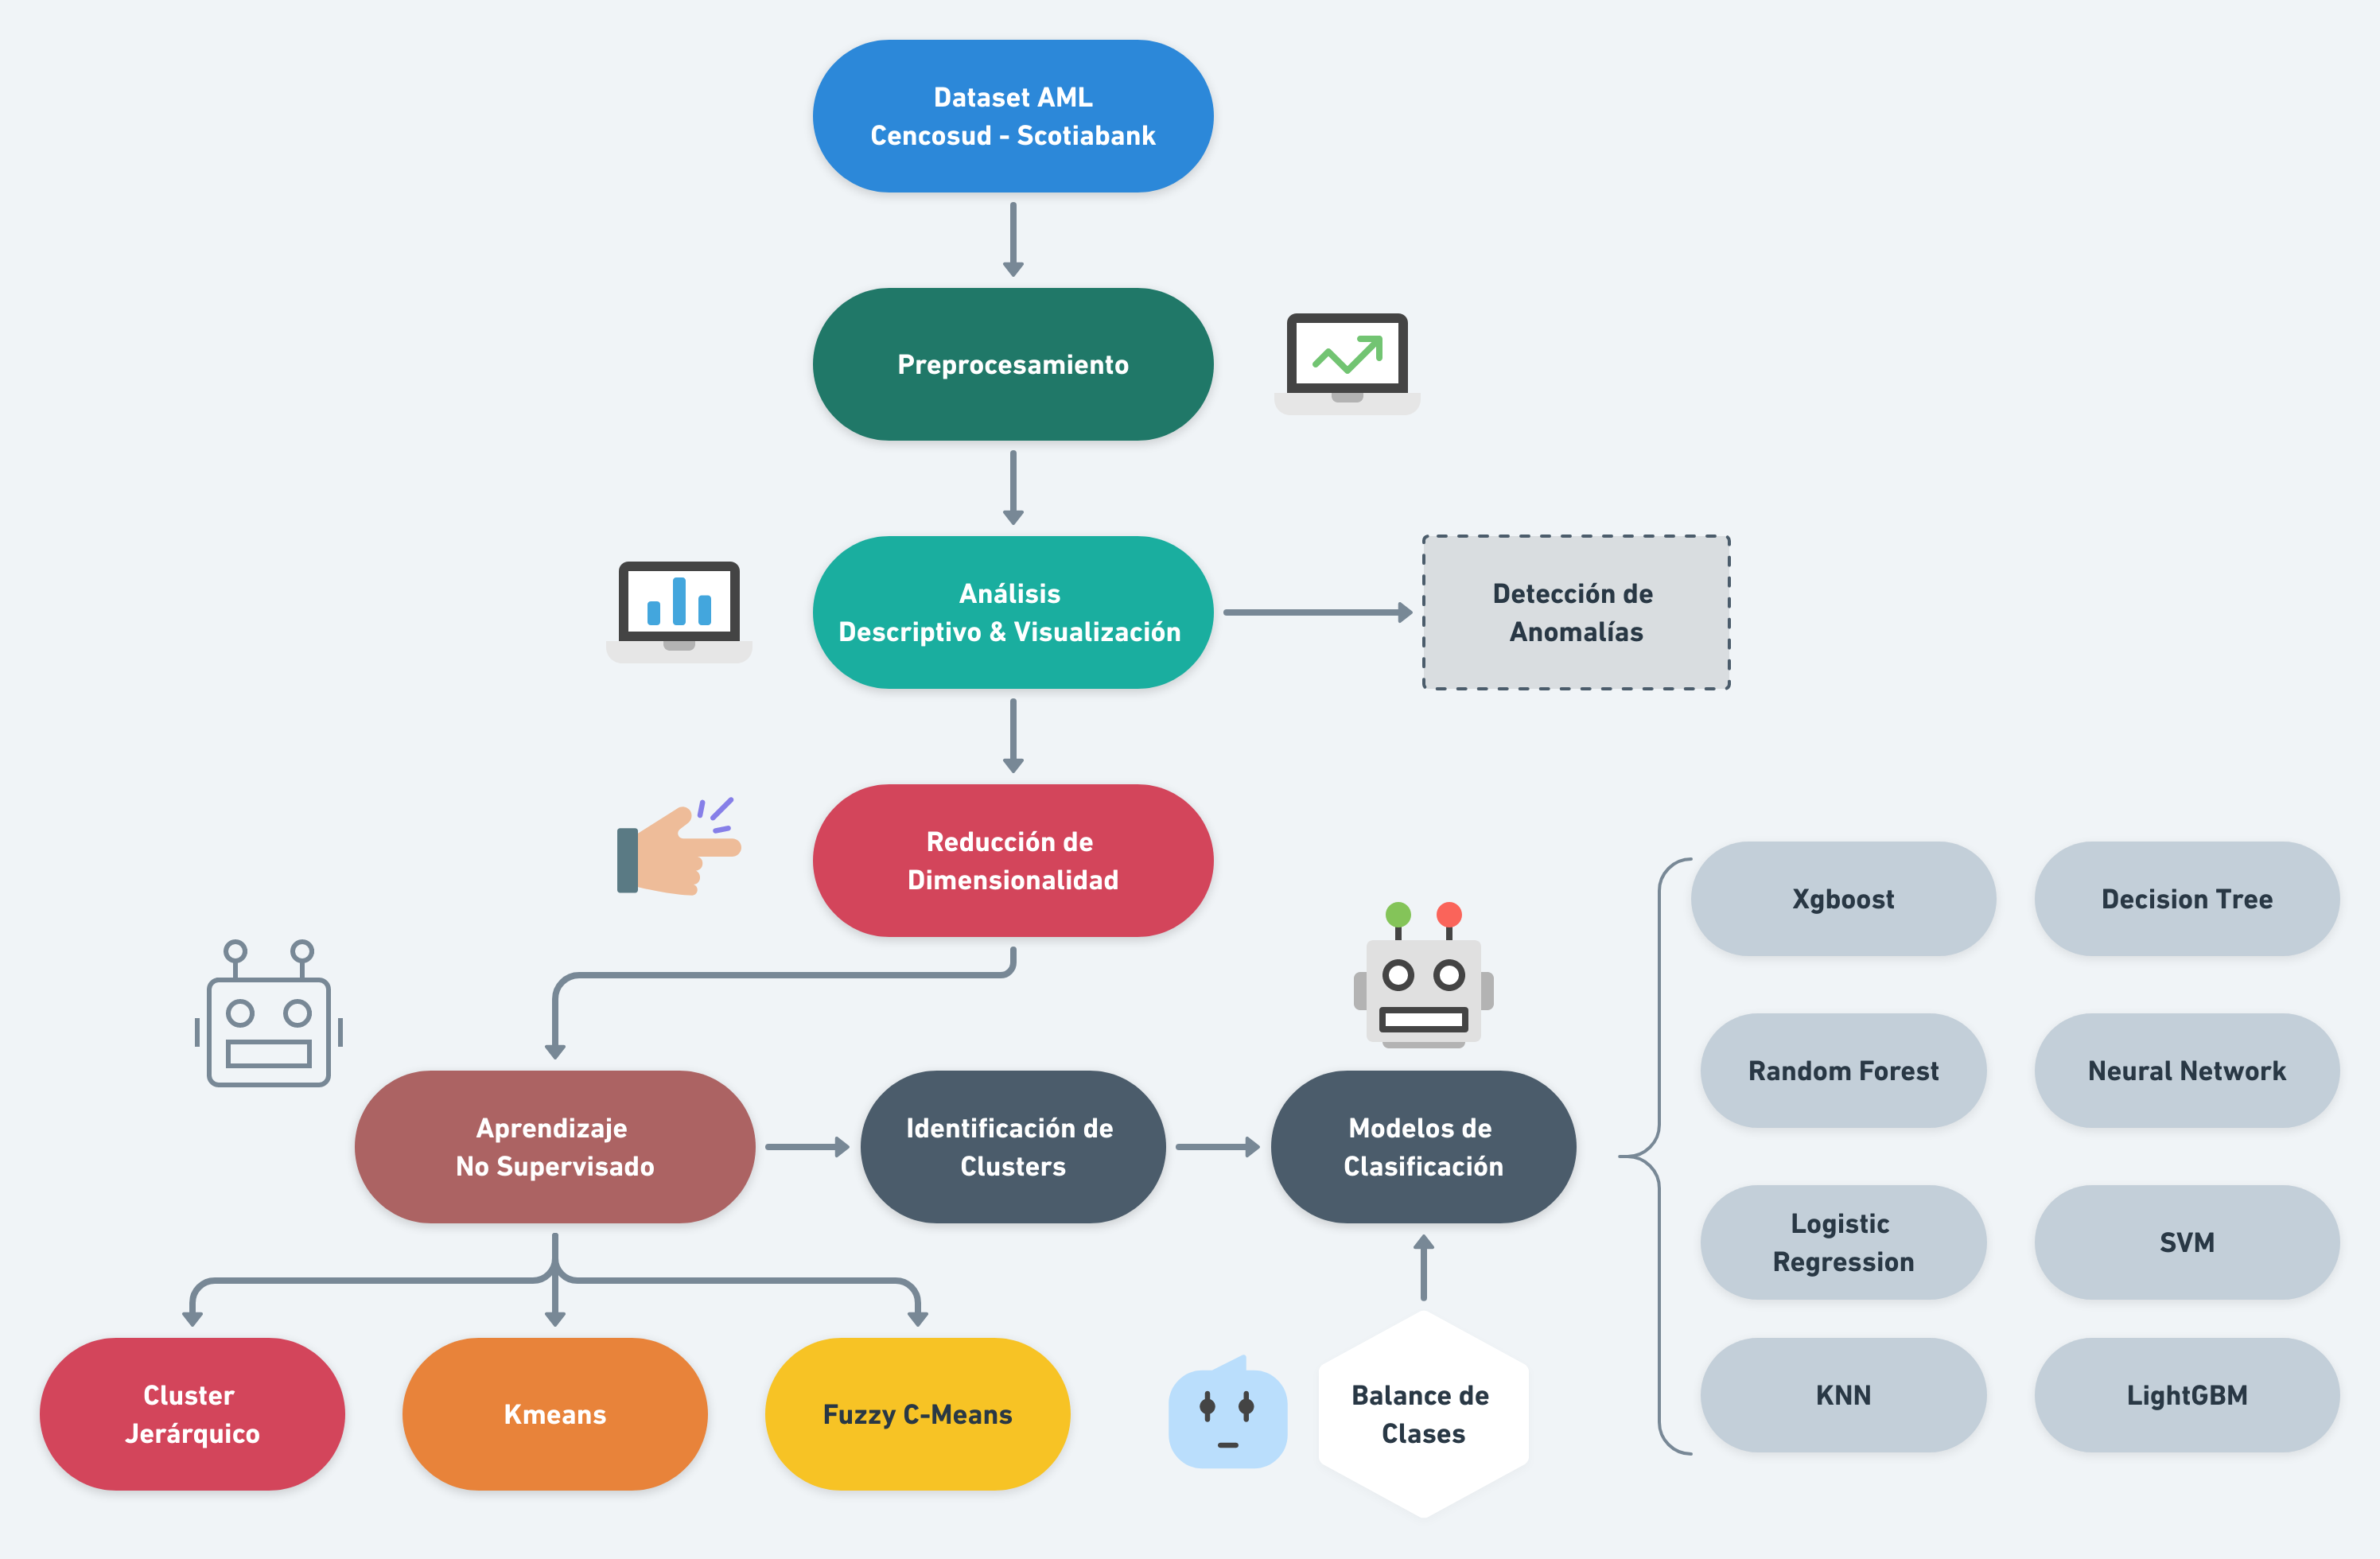

In [ ]:
#instalacion clusters
! pip install colorama scikit-fuzzy

     |████████████████████████████████| 1.0MB 6.0MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-cp36-none-any.whl size=894070 sha256=dd76e28a84516acb5129f7a2a2fe59853634cd064df17a498f962bab4dc3f62f
  Stored in directory: /root/.cache/pip/wheels/b9/4e/77/da79b16f64ef1738d95486e2731eea09d73e90a72465096600
Successfully built scikit-fuzzy


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
###instalacion todas las librerias
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.svm import OneClassSVM
from numpy import quantile, where, random
import sklearn.metrics as metrics
import seaborn as sns
import skfuzzy as fuzz
import numpy as np
import pandas as pd
import warnings
pd.options.display.max_columns = None
warnings.filterwarnings("ignore")
sns.set_style('darkgrid')

nuevo

In [ ]:
###carga de base limpia que viene de R studio
data = pd.read_csv("Base_sin_correlaciones_oficial2.csv")  

In [ ]:
data.head(5)

,Unnamed: 0,AntigCta_enMss,Mora_Char_004,Deuda_Char_008_s3,Pago_Char_041,Pago_Char_040,LCDISP_RELMAX12,CONSUMO_NBAJAS,DETERIORO_MAX12,INS_REL12,DETERIORO_NALTAS,SCRIDC_R,EDAD,CANTIDAD_BBRR,CANTIDAD_CTACTE,MAXIMO_CONSULTA_RUT,PROMEDIO_CONSULTA_RUT,ESTIMADOR_RENTA,MESES_SISA_3,MESES_JOHNSON_3,MtoComp_sum_TC_201901,PAGO_01_TOTAL,PAGA_vs_COMPRA,dif_canalesde_pago_TC_TA_CONSUMO,Pago_Char_008_arr,MONTO_COMPRA01,NUMERO_TRX01,COMPRA_01_03,sum_cantidad_depagos_tc_ta_consumo,casino,tecno_mayor_700000,Mora_Char_005,Deuda_Char_012_s3,ENDEUDAMIENTO_MAX03,CONSUMO_RELMAX12,ENDEUDAMIENTO_RELMAX12,MESES_PARIS_3,Pago_Char_002,Score_Final_N_R,MESES_JUMBO_12_F,TOTAL_12,Coef_variacion_pagos,contador_pago_cero,TRX_01_06,TRX_01_03_12,RATIO_MENOR1_ULT12MSS,COMPRA_01_03_06,SEXO,TIPO_COMPRA
0,1,121,12,5,-477,1904,100,3,0,0,0,37,73,6,0,0,0,14,0,0,0.0,1300000.0,78,1,-648,1648060.0,46,34,12,0,0,0,-3,0,0,0,2,12,642,9,35,0,0,24,30,12,53,1,1
1,2,209,12,5,154,173,100,4,0,0,0,31,70,1,1,0,0,14,2,0,0.0,1752274.0,224,2,277,781300.0,37,29,3,1,0,0,6,4,0,0,3,12,653,9,40,0,0,27,50,11,52,1,2
2,3,31,12,6,1592,1590,100,4,0,100,0,31,64,1,1,0,0,14,1,0,0.0,1751000.0,93,2,653,1874684.0,17,45,9,1,0,0,18,29,0,0,1,12,646,1,7,0,0,25,42,12,63,1,1
3,4,5,12,3,258,258,100,2,0,0,0,37,54,3,1,0,0,13,0,0,0.0,1203800.0,100,1,326,1203786.0,1,100,2,0,0,0,0,24,0,0,0,3,578,0,0,2,9,33,33,3,61,2,1
4,5,180,12,5,142,157,100,5,0,0,0,31,56,1,1,1,0,14,0,0,0.0,2046690.0,25,2,210,7989798.0,26,81,3,0,0,0,25,39,0,0,2,12,649,9,29,0,0,15,24,12,58,2,1


In [ ]:
####no

cols = ['AntigCta_enMss',
'Mora_Char_004',
'Deuda_Char_008_s3',
'Pago_Char_040',
'Pago_Char_041',
        'LCDISP_RELMAX12',
'CONSUMO_NBAJAS',
'DETERIORO_MAX12',
'INS_REL12',
'DETERIORO_NALTAS',
'SCRIDC_R',
'EDAD',
'CANTIDAD_BBRR',
'CANTIDAD_CTACTE',
'MAXIMO_CONSULTA_RUT',
'PROMEDIO_CONSULTA_RUT',
'ESTIMADOR_RENTA',
'MESES_SISA_3',
'MESES_JOHNSON_3',
'MtoComp_sum_TC_201901',
'PAGO_01_TOTAL',
'PAGA_vs_COMPRA',
'dif_canalesde_pago_TC_TA_CONSUMO',
'Pago_Char_008_arr',
'MONTO_COMPRA01',
'NUMERO_TRX01',
'COMPRA_01_03',
'sum_cantidad_depagos_tc_ta_consumo',
'casino',
'tecno_mayor_700000',
'Mora_Char_005',
'Deuda_Char_012_s3',
'ENDEUDAMIENTO_MAX03',
'CONSUMO_RELMAX12',
'ENDEUDAMIENTO_RELMAX12',
'Coef_variacion_pagos',
'contador_pago_cero',
'TRX_01_06',
'TRX_01_03_12',
'COMPRA_01_03_06',
'Pago_Char_002',
'RATIO_MENOR1_ULT12MSS',
'Score_Final_N_R',
'MESES_PARIS_3',
'MESES_JUMBO_12_F',
'TOTAL_12'
]

In [ ]:
data1 = data[cols]
data1.head(4)

,AntigCta_enMss,Mora_Char_004,Deuda_Char_008_s3,Pago_Char_040,Pago_Char_041,LCDISP_RELMAX12,CONSUMO_NBAJAS,DETERIORO_MAX12,INS_REL12,DETERIORO_NALTAS,SCRIDC_R,EDAD,CANTIDAD_BBRR,CANTIDAD_CTACTE,MAXIMO_CONSULTA_RUT,PROMEDIO_CONSULTA_RUT,ESTIMADOR_RENTA,MESES_SISA_3,MESES_JOHNSON_3,MtoComp_sum_TC_201901,PAGO_01_TOTAL,PAGA_vs_COMPRA,dif_canalesde_pago_TC_TA_CONSUMO,Pago_Char_008_arr,MONTO_COMPRA01,NUMERO_TRX01,COMPRA_01_03,sum_cantidad_depagos_tc_ta_consumo,casino,tecno_mayor_700000,Mora_Char_005,Deuda_Char_012_s3,ENDEUDAMIENTO_MAX03,CONSUMO_RELMAX12,ENDEUDAMIENTO_RELMAX12,Coef_variacion_pagos,contador_pago_cero,TRX_01_06,TRX_01_03_12,COMPRA_01_03_06,Pago_Char_002,RATIO_MENOR1_ULT12MSS,Score_Final_N_R,MESES_PARIS_3,MESES_JUMBO_12_F,TOTAL_12
0,121,12,5,1904,-477,100,3,0,0,0,37,73,6,0,0,0,14,0,0,0.0,1300000.0,78,1,-648,1648060.0,46,34,12,0,0,0,-3,0,0,0,0,0,24,30,53,12,12,642,2,9,35
1,209,12,5,173,154,100,4,0,0,0,31,70,1,1,0,0,14,2,0,0.0,1752274.0,224,2,277,781300.0,37,29,3,1,0,0,6,4,0,0,0,0,27,50,52,12,11,653,3,9,40
2,31,12,6,1590,1592,100,4,0,100,0,31,64,1,1,0,0,14,1,0,0.0,1751000.0,93,2,653,1874684.0,17,45,9,1,0,0,18,29,0,0,0,0,25,42,63,12,12,646,1,1,7
3,5,12,3,258,258,100,2,0,0,0,37,54,3,1,0,0,13,0,0,0.0,1203800.0,100,1,326,1203786.0,1,100,2,0,0,0,0,24,0,0,2,9,33,33,61,3,3,578,0,0,0


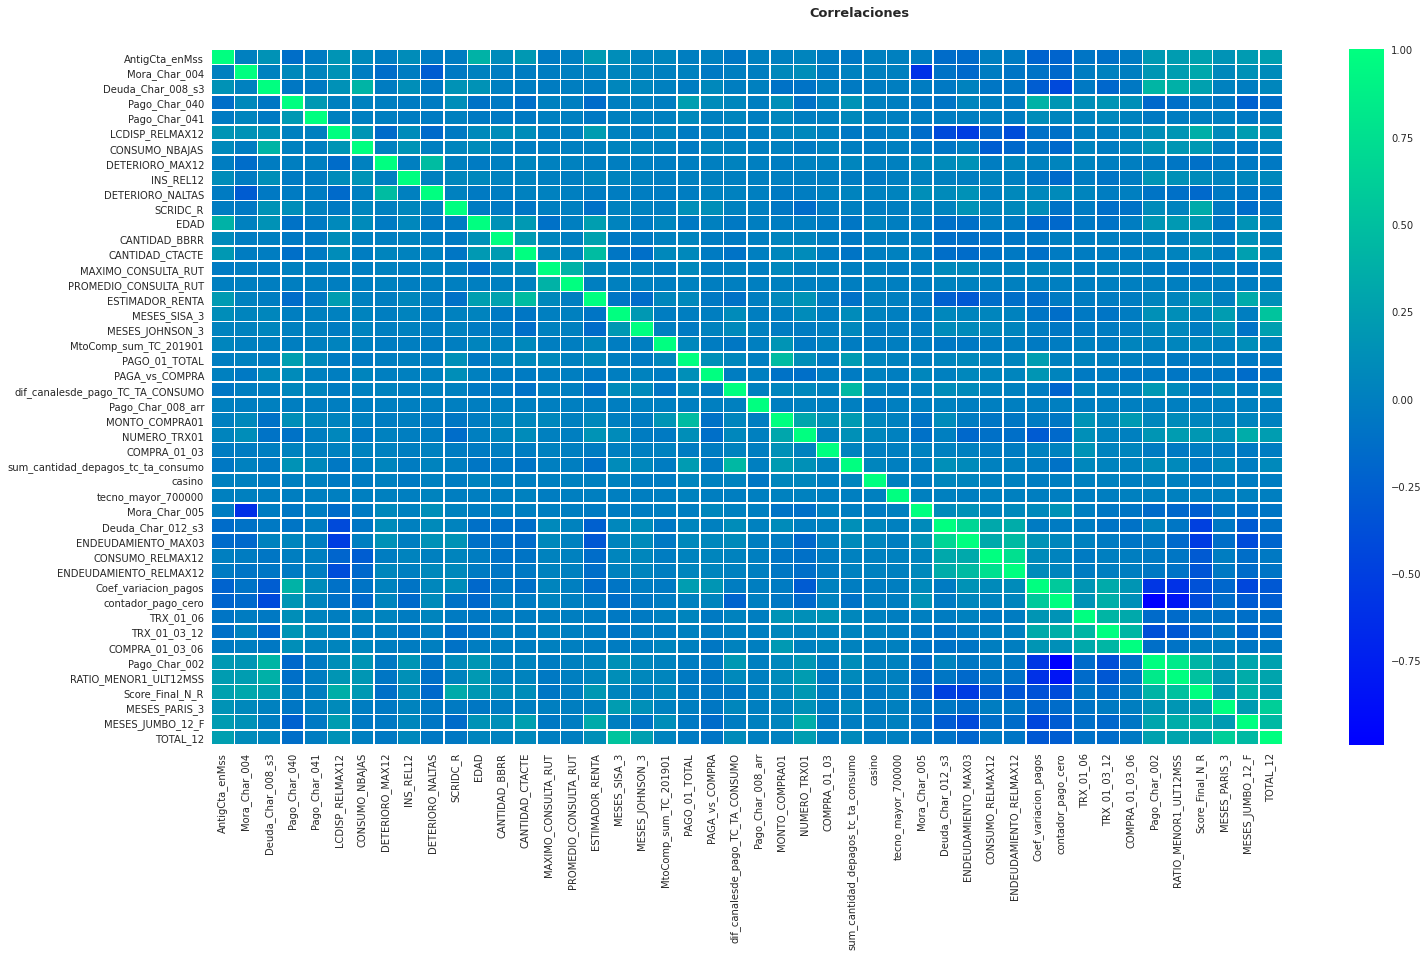

In [ ]:
###correlaciones de todas las variables 
fig, (ax) = plt.subplots(1, 1, figsize=(24,12))
corr = data1.corr()
sns.heatmap(corr,ax = ax,cmap='winter',  linewidths=.5)
fig.subplots_adjust(top=0.93)
fig.suptitle('Correlaciones', fontsize=13,fontweight='bold')
plt.show()

In [ ]:
#escalar matriz
scaler=StandardScaler()
scaler.fit(data1) # calculo la media para poder hacer la transformacion
X_scaled=scaler.transform(data1)# Ahora si, escalo los datos y los normalizo

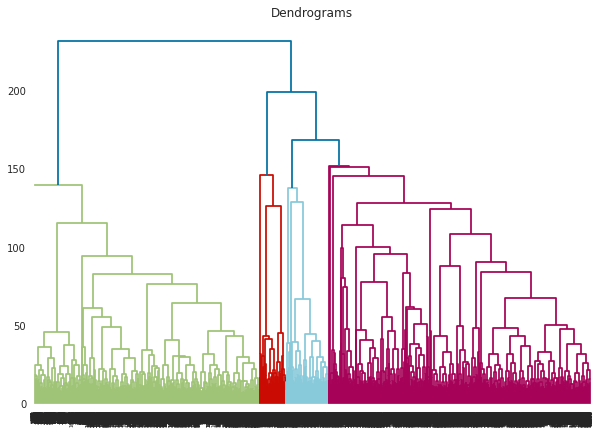

In [ ]:
#####Visualizar mediante dendrograma el numero de divisiones o grupos segun cluster jerarquico
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(X_scaled, method='ward'))

In [ ]:
###cluster jerarquico segun dendrograma 
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
cluster.fit_predict(X_scaled)

array([0, 0, 0, ..., 2, 0, 0])

In [ ]:
###incorporar a la data el cluster segun dendrograma
data['hc'] = cluster.fit_predict(X_scaled)

In [ ]:
#Instanciamos objeto PCA y aplicamos
pca = PCA(n_components=46) # Otra opción es instanciar pca sólo con dimensiones nuevas hasta obtener un mínimo "explicado" ej.: pca=PCA(.85)
pca.fit(X_scaled) # obtener los componentes principales
X_pca = pca.transform(X_scaled) # convertimos nuestros datos con las nuevas dimensiones de PCA

In [ ]:
pc_df = pd.DataFrame(data = X_pca, columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7',
                                            'PC8','PC9','PC10','P11', 'P12','P13', 'P14',
                                            'P15', 'P16', 'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 
                                            'P24', 'P25', 'P26', 'P27', 'P28', 'P29', 'P30', 'P31', 'P32', 'P33',
                                            'P34', 'P35', 'P36', 'P37', 'P38', 'P39', 'P40', 'P41', 'P42', 'P43',
                                            'P44', 'P45', 'P46'
                                            ])

In [ ]:
pc_df.head(5)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,P38,P39,P40,P41,P42,P43,P44,P45,P46
0,-2.957562,3.770953,3.822838,2.573154,0.902354,-2.124851,0.954857,3.469858,-2.299514,0.598400,-1.508849,-0.181715,0.394295,-0.371740,-1.421160,-1.507086,0.234516,0.521065,-1.118621,-1.321510,1.314332,0.720670,1.237210,2.395003,-0.998458,-1.719693,5.521475,0.545138,-2.751538,2.162268,0.745464,-2.087719,-2.287957,1.203089,-2.185693,-0.335406,0.444386,0.077666,0.379157,0.185012,0.380356,2.024034,-0.603512,-0.165123,-0.524611,-0.003028
1,-3.855136,3.319496,1.534854,-0.165640,-0.300876,-2.376203,-1.096673,1.435058,-0.964102,-0.208740,-1.677134,3.632980,4.062229,0.117113,-0.070120,-2.056246,1.618472,-1.489238,0.854640,-2.144019,-2.890114,0.900397,-0.750280,0.938673,-1.185100,-1.346911,0.378700,0.770698,1.076235,-0.222252,-0.383806,0.211046,-0.463796,-0.084027,-0.512358,0.208636,-0.313117,-0.063817,-0.000192,-0.016555,0.268417,0.149052,-0.277653,-0.025529,0.122565,-0.008512
2,-1.168350,3.095040,4.607252,3.545778,2.199546,-1.702241,-0.283606,3.000319,-1.848357,-0.153278,-3.220785,3.335610,3.607563,-2.839814,0.575951,-0.568181,-0.296240,-2.554817,-0.516731,-1.991196,-3.623416,2.051578,-0.146786,1.273142,-0.376694,-2.684677,2.873729,0.565230,-0.974415,1.492057,0.913268,-1.211966,-1.404939,0.106345,-1.445160,-0.416843,1.117644,-0.669239,0.071694,-0.683742,0.524387,0.136000,-0.299406,0.437802,0.329435,-0.030603
3,4.300111,6.922387,-0.464328,2.446363,-0.779748,-1.248792,-0.476314,3.057787,-0.820132,0.159541,0.556290,1.072655,0.222741,0.482853,-1.701125,-1.430556,-0.792495,0.593224,-1.042112,-1.691046,0.613719,-0.153797,-1.497869,0.885551,-0.600076,-0.723826,-1.092854,0.406337,1.071173,0.496953,0.285029,-0.633365,-0.898233,0.834940,-0.331706,0.637189,1.051919,0.213839,-0.082285,0.330185,0.808930,0.331394,-0.014670,0.200941,-0.899223,-0.001134
4,-3.399978,2.805323,1.970652,0.480068,1.647664,-1.764483,-1.362944,2.665953,-0.143044,-1.011102,1.167048,1.259202,-0.021606,-0.627467,-0.358313,-0.948814,0.168029,-0.005217,-0.073089,-0.325939,1.163482,-0.170632,0.205336,0.483571,-1.836325,-1.346090,-1.159177,0.216751,0.094280,0.012548,-0.527299,-0.110266,-0.289612,0.649238,0.049501,-0.473045,0.434058,-1.415556,0.055716,1.489944,0.813902,-0.181598,0.073939,-0.340853,-0.145990,-0.000543


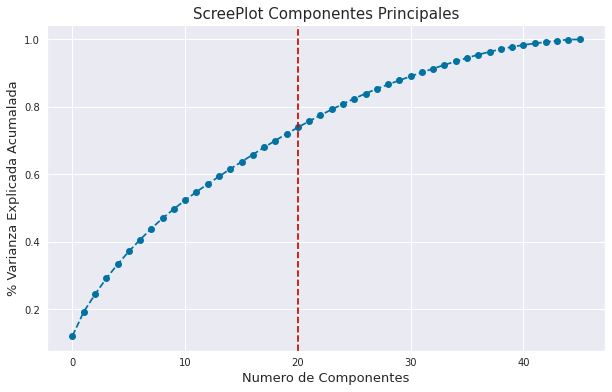

In [ ]:
#graficamos el acumulado de varianza explicada en las nuevas dimensiones
plt.figure(figsize=(10,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_),marker='o',linestyle='--')
plt.axvline(x=20, color='r', linestyle='--')
plt.title('ScreePlot Componentes Principales',fontsize=15)
plt.xlabel('Numero de Componentes',fontsize=13)
plt.ylabel('% Varianza Explicada Acumalada', fontsize=13)
plt.show()

In [ ]:
pca = PCA(n_components=20) # 4 porque recoje al menos 75% de variabilidad
pca.fit(X_scaled)
scores_pca = pca.transform(X_scaled) # convertimos nuestros datos con las nuevas dimensiones de PCA

In [ ]:
wcss = []
for i in range(1,21):
  kmeans_pca = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans_pca.fit(scores_pca)
  wcss.append(kmeans_pca.inertia_)

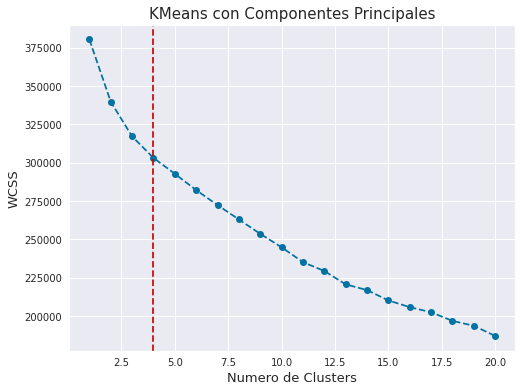

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(range(1,21), wcss, marker='o',linestyle='--')
plt.axvline(x=4, color='r', linestyle='--')
plt.title('KMeans con Componentes Principales',fontsize=15)
plt.xlabel('Numero de Clusters',fontsize=13)
plt.ylabel('WCSS', fontsize=13)
plt.show()

In [ ]:
seed = 1000
kmeans  = KMeans(n_clusters=4, n_init=10)
kmeans.fit(scores_pca)
y_kmeans = kmeans.predict(scores_pca)

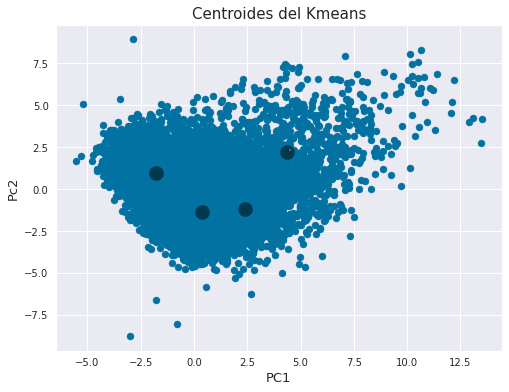

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(scores_pca[:,0],scores_pca[:,1],s=50)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.title('Centroides del Kmeans',fontsize=15)
plt.xlabel('PC1',fontsize=13)
plt.ylabel('Pc2', fontsize=13)
plt.show()

In [ ]:
score = silhouette_score(scores_pca, kmeans.labels_, metric='euclidean')
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.119


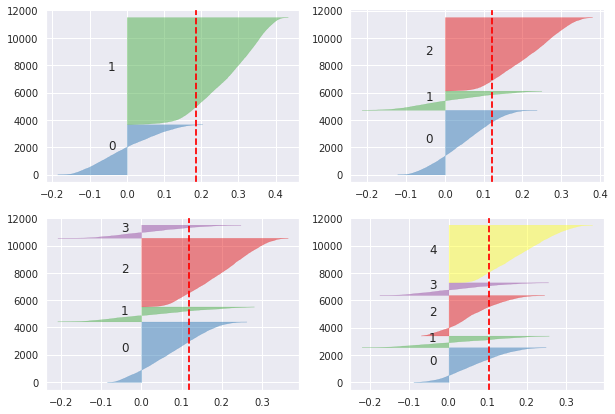

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(10,7))
for i in [2, 3, 4, 5]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick',ax=ax[q-1][mod])
    visualizer.fit(scores_pca)

In [ ]:
scores_pc_df = pd.DataFrame(data = scores_pca, columns=['PC1','PC2','PC3','PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'P11', 'P12', 'P13', 'P14'
, 'P15', 'P16', 'P18', 'P19', 'P20' ,'P21'                                                       ])
scores_pc_df['Cluster'] =  pd.Series(y_kmeans, index=scores_pc_df.index)
scores_pc_df.head(10)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,P11,P12,P13,P14,P15,P16,P18,P19,P20,P21,Cluster
0,-2.957579,3.770318,3.819997,2.575380,0.900856,-2.145661,1.041105,3.461262,-2.191054,0.765337,-1.540911,-0.290739,0.483794,-0.510029,-1.331852,-1.316243,-0.053792,0.555185,-1.305455,-1.755666,0
1,-3.855140,3.319302,1.535483,-0.165368,-0.301542,-2.384376,-1.085864,1.433287,-0.954103,-0.214043,-1.676069,3.660076,4.043512,0.308395,-0.111669,-2.609878,0.647309,-1.455803,0.914212,-2.721029,0
2,-1.168360,3.094579,4.606509,3.546959,2.197751,-1.717584,-0.237347,2.994809,-1.789192,-0.102237,-3.227359,3.292672,3.727451,-2.711793,0.915297,-0.726478,-0.751901,-2.464822,-0.638933,-3.055608,0
3,4.300109,6.922330,-0.463913,2.446458,-0.780163,-1.253118,-0.477033,3.058148,-0.827401,0.134586,0.566601,1.073238,0.224567,0.474698,-2.040607,-0.764443,-1.111674,0.650984,-0.729008,-1.641028,1
4,-3.399978,2.805279,1.971612,0.479886,1.647629,-1.768349,-1.370245,2.667235,-0.154968,-1.043824,1.189474,1.285927,-0.018072,-0.596434,-0.535125,-0.874736,-0.176402,0.062948,0.101100,0.002679,0
5,-1.900189,3.769024,3.125762,1.440043,0.112595,-2.934757,0.371100,2.161675,1.171466,-0.195750,1.388277,1.196037,-0.462972,-0.424972,0.166176,0.196679,-0.105575,0.081490,-0.611589,0.015808,0
6,2.831454,6.077222,0.106581,2.102954,1.558900,-4.128216,-1.541569,1.400149,0.115548,-2.670196,0.483214,-0.342141,0.406169,0.543952,-0.366740,-0.416483,-0.158200,0.176030,-0.439147,-0.192356,1
7,-1.636476,2.539151,1.467818,2.616048,1.314107,-1.815044,-3.871164,3.125038,-0.242710,-0.892040,0.718685,1.202146,-0.156080,0.755219,0.008507,-0.836843,0.265186,-0.474990,-0.267884,0.543221,0
8,-1.972428,2.002944,5.994007,3.146212,-0.756321,-3.813654,-0.699592,4.085117,-0.768650,-0.406444,-1.788332,0.073165,0.078886,-2.860799,0.448363,-0.030431,-1.164276,-0.849623,-1.762815,0.180830,0
9,4.306991,5.875660,2.552337,1.728444,-0.523709,-2.107628,-2.665633,2.305989,-0.597591,-0.522823,-0.254392,1.264406,-0.431358,0.036521,-0.014753,-0.114332,-0.286218,-0.663856,-0.456727,-1.042841,1


In [ ]:
data['Cluster'] = pd.Series(y_kmeans, index=scores_pc_df.index)

In [ ]:
data.groupby('Cluster').size()

Cluster
0    4999
1    1095
2    4447
3     953
dtype: int64

In [ ]:
#####guardar y trabajar con ese 
from google.colab import drive
drive.mount('drive')
data.to_csv('data_modelar_2.csv')
!cp data_modelar_2.csv "drive/My Drive/"

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


<Figure size 576x432 with 0 Axes>

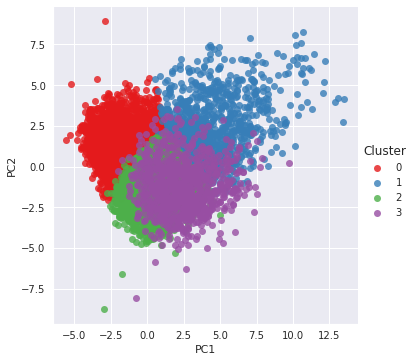

In [ ]:
###visualizar cluster kmeans
plt.figure(figsize=(8,6))
ax1 = sns.lmplot(data=scores_pc_df, x='PC1', y='PC2', hue='Cluster', 
                   fit_reg=False, legend=True, legend_out=True, palette="Set1")

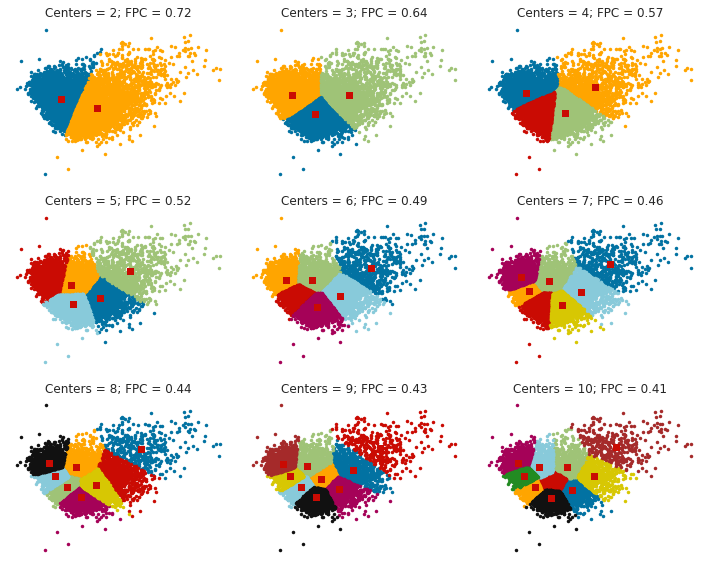

In [ ]:
###visualizar en dos dimensiones fuzzy cmenas  con diferentes numeros de cluster 

colors = ['b', 'orange', 'g', 'r', 'c', 'm', 'y', 'k', 'Brown', 'ForestGreen']
xpts = scores_pc_df['PC1']
ypts = scores_pc_df['PC2']

fig1, axes1 = plt.subplots(3, 3, figsize=(10, 8))
alldata = np.vstack((xpts, ypts))
fpcs = []

for ncenters, ax in enumerate(axes1.reshape(-1), 2):
    cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
        alldata, ncenters, 2, error=0.005, maxiter=1000, init=None)

    # Store fpc values for later
    fpcs.append(fpc)

    # Plot assigned clusters, for each data point in training set
    cluster_membership = np.argmax(u, axis=0)
    for j in range(ncenters):
        ax.plot(xpts[cluster_membership == j],
                ypts[cluster_membership == j], '.', color=colors[j])

    # Mark the center of each fuzzy cluster
    for pt in cntr:
        ax.plot(pt[0], pt[1], 'rs')

    ax.set_title('Centers = {0}; FPC = {1:.2f}'.format(ncenters, fpc))
    ax.axis('off')

fig1.tight_layout()

El FPC se define en el rango de 0 a 1, siendo 1 el mejor. Es una métrica que nos dice qué tan limpiamente se describen nuestros datos mediante un determinado modelo. A continuación, agruparemos nuestro conjunto de datos. Luego mostraremos los resultados de la agrupación y trazaremos el coeficiente de partición difusa. Cuando se maximiza el FPC, nuestros datos se describen mejor.

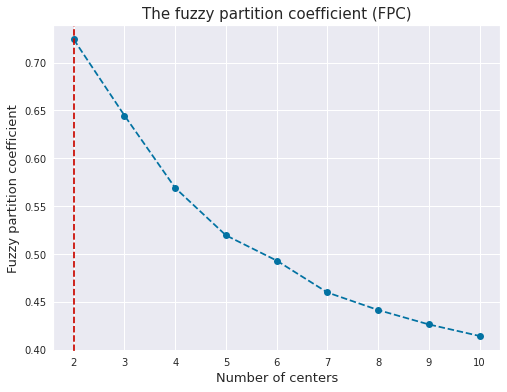

In [ ]:
fig2, ax2 = plt.subplots(figsize=(8,6))
ax2.plot(np.r_[2:11], fpcs, marker='o',linestyle='--')
plt.axvline(x=2, color='r', linestyle='--')
ax2.set_xlabel("Number of centers", fontsize=13)
ax2.set_ylabel("Fuzzy partition coefficient", fontsize=13)
plt.title('The fuzzy partition coefficient (FPC)',fontsize=15)
plt.show()

Como podemos ver, el número ideal de centros es 2. Tener el FPC disponible puede ser muy útil cuando la estructura de sus datos no está clara.

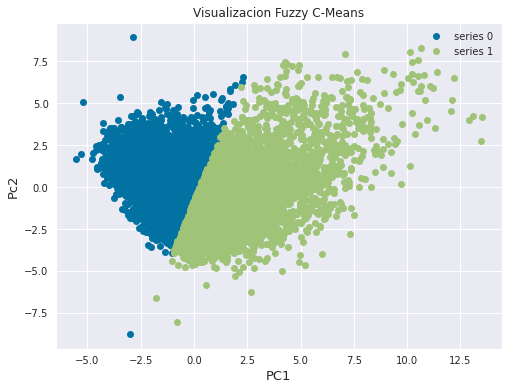

In [ ]:
cntr, u_orig, _, _, _, _, _ = fuzz.cluster.cmeans(
    alldata, 2, 2, error=0.005, maxiter=1000)
fig2, ax2 = plt.subplots(figsize=(8,6))
ax2.set_title('Visualizacion Fuzzy C-Means')
ax2.set_xlabel('PC1',fontsize=13)
ax2.set_ylabel('Pc2', fontsize=13)
for j in range(2):
    ax2.plot(alldata[0, u_orig.argmax(axis=0) == j],
             alldata[1, u_orig.argmax(axis=0) == j], 'o',
             label='series ' + str(j))
ax2.legend()
plt.show()

In [ ]:
u, u0, d, jm, p, fpc = fuzz.cluster.cmeans_predict(alldata, cntr, 2, error=0.005, maxiter=1000)
cluster_membership = np.argmax(u, axis=0)

In [ ]:
data['FCM'] = cluster_membership = np.argmax(u, axis=0)
data.head(12)

,Unnamed: 0,AntigCta_enMss,Mora_Char_004,Deuda_Char_008_s3,Pago_Char_041,Pago_Char_040,LCDISP_RELMAX12,CONSUMO_NBAJAS,DETERIORO_MAX12,INS_REL12,DETERIORO_NALTAS,SCRIDC_R,EDAD,CANTIDAD_BBRR,CANTIDAD_CTACTE,MAXIMO_CONSULTA_RUT,PROMEDIO_CONSULTA_RUT,ESTIMADOR_RENTA,MESES_SISA_3,MESES_JOHNSON_3,MtoComp_sum_TC_201901,PAGO_01_TOTAL,PAGA_vs_COMPRA,dif_canalesde_pago_TC_TA_CONSUMO,Pago_Char_008_arr,MONTO_COMPRA01,NUMERO_TRX01,COMPRA_01_03,sum_cantidad_depagos_tc_ta_consumo,casino,tecno_mayor_700000,Mora_Char_005,Deuda_Char_012_s3,ENDEUDAMIENTO_MAX03,CONSUMO_RELMAX12,ENDEUDAMIENTO_RELMAX12,MESES_PARIS_3,Pago_Char_002,Score_Final_N_R,MESES_JUMBO_12_F,TOTAL_12,Coef_variacion_pagos,contador_pago_cero,TRX_01_06,TRX_01_03_12,RATIO_MENOR1_ULT12MSS,COMPRA_01_03_06,SEXO,TIPO_COMPRA,hc,Cluster,FCM
0,1,121,12,5,-477,1904,100,3,0,0,0,37,73,6,0,0,0,14,0,0,0.0,1300000.0,78,1,-648,1648060.0,46,34,12,0,0,0,-3,0,0,0,2,12,642,9,35,0,0,24,30,12,53,1,1,0,0,0
1,2,209,12,5,154,173,100,4,0,0,0,31,70,1,1,0,0,14,2,0,0.0,1752274.0,224,2,277,781300.0,37,29,3,1,0,0,6,4,0,0,3,12,653,9,40,0,0,27,50,11,52,1,2,0,0,0
2,3,31,12,6,1592,1590,100,4,0,100,0,31,64,1,1,0,0,14,1,0,0.0,1751000.0,93,2,653,1874684.0,17,45,9,1,0,0,18,29,0,0,1,12,646,1,7,0,0,25,42,12,63,1,1,0,0,0
3,4,5,12,3,258,258,100,2,0,0,0,37,54,3,1,0,0,13,0,0,0.0,1203800.0,100,1,326,1203786.0,1,100,2,0,0,0,0,24,0,0,0,3,578,0,0,2,9,33,33,3,61,2,1,2,1,1
4,5,180,12,5,142,157,100,5,0,0,0,31,56,1,1,1,0,14,0,0,0.0,2046690.0,25,2,210,7989798.0,26,81,3,0,0,0,25,39,0,0,2,12,649,9,29,0,0,15,24,12,58,2,1,1,0,0
5,6,89,12,4,304,686,100,8,0,100,0,31,38,2,1,2,0,14,1,1,0.0,3133999.0,75,1,812,4128183.0,11,86,4,0,0,0,12,32,1,0,3,11,637,8,37,1,1,28,30,11,78,1,1,1,0,0
6,7,42,10,5,143,266,100,6,0,100,0,31,33,3,1,1,0,14,0,0,0.0,2010703.0,84,2,268,2391541.0,7,100,2,0,0,1,5,2,1,0,0,6,594,1,0,1,6,63,50,6,80,1,1,2,1,1
7,8,40,12,6,99,119,99,6,0,0,0,31,32,0,0,0,0,12,0,0,0.0,1867055.0,94,2,108,1985841.0,80,29,2,0,0,0,43,16,0,0,0,12,626,0,1,0,0,21,27,11,57,2,1,1,0,0
8,9,58,12,6,1551,1397,100,5,0,0,0,32,41,0,0,1,0,4,0,2,0.0,1360000.0,62,4,-478,2161605.0,76,50,6,0,0,0,-4,0,0,0,3,12,609,3,21,0,0,19,29,12,42,2,1,0,0,0
9,10,5,12,3,568,568,100,4,0,100,0,31,37,0,0,0,0,8,0,0,0.0,1125740.0,104,2,205,1072189.0,58,48,4,0,0,0,47,32,4,1,0,4,572,0,0,1,8,32,77,4,79,1,1,2,1,1


In [ ]:
data.groupby('FCM').size()

FCM
0    6618
1    4876
dtype: int64

In [ ]:
data2 = data.rename(columns={'sum_cantidad_depagos_tc_ta_consumo':'Cantidad_Pagos',
                                   'ENDEUDAMIENTO_MAX03':'Endeudamiento_max03', 'PAGA_vs_COMPRA':'Pagos/Compras' ,
                                   'TRX_01_03_12':'%_TRX_actual_v/s_03-12_meses', 
                                   'dif_canalesde_pago_TC_TA_CONSUMO':'Dif_canales_pagos',
                             'Pago_Char_040':'Pago_sobre_deuda_corto_plazo'
                                   })

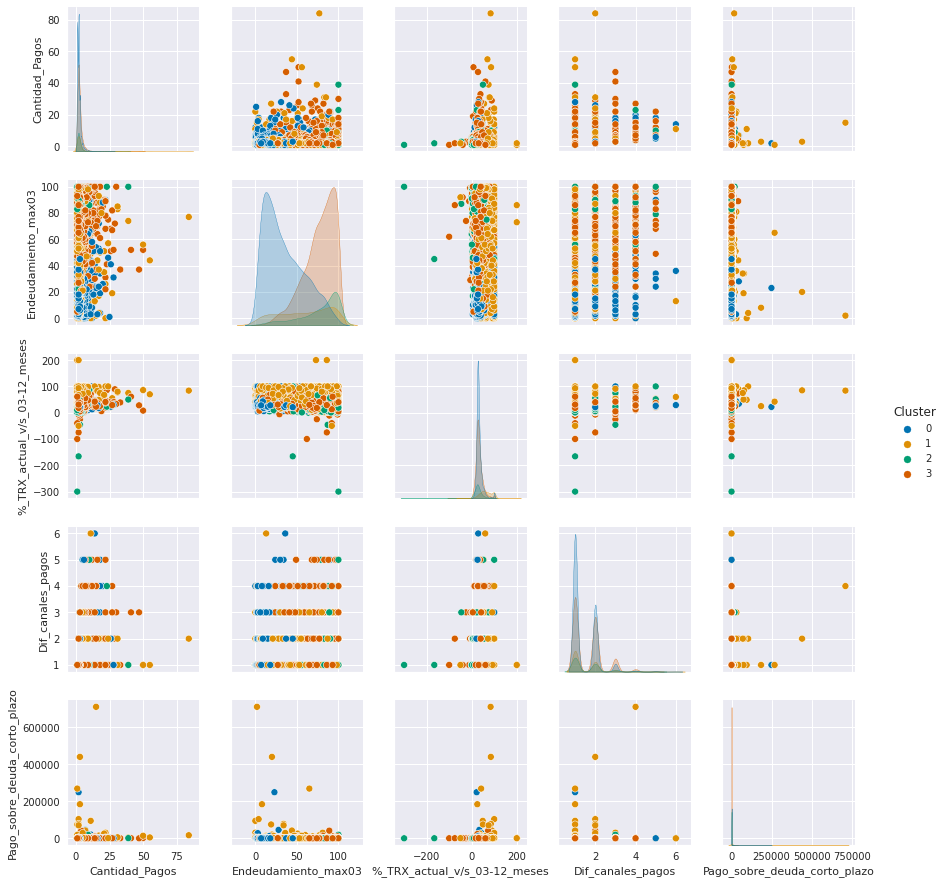

In [ ]:
sns.pairplot(data2, hue="Cluster", vars=["Cantidad_Pagos","Endeudamiento_max03",
                                         "%_TRX_actual_v/s_03-12_meses", "Dif_canales_pagos", 
                                         "Pago_sobre_deuda_corto_plazo"
                                         ],palette='colorblind')

In [ ]:
from google.colab import drive
drive.mount('drive')
data.to_csv('data_modelar_flag2.csv')
!cp data_modelar_flag2.csv "drive/My Drive/"

**Modelos de Clasificacion**


In [ ]:
data = pd.read_csv("data_modelar_flag2.csv")  

In [ ]:
data.groupby('Cluster').size()

In [ ]:
####transformar cluster de kmeans 
#### el cluster 2 de 1099 clientes es el catalogado como atipico
flag = {0:0, 1:0, 2:1 , 3:0}
data['flag'] = data['Cluster'].replace(flag)

In [ ]:
cols = ['Pago_Char_040', 'TRX_01_03_12', 'ENDEUDAMIENTO_RELMAX12', 'EDAD' , 'TOTAL_12',
        'contador_pago_cero','PAGA_vs_COMPRA','MONTO_COMPRA01'       ,'NUMERO_TRX01'
        ]

In [ ]:
data.groupby('flag').size()

flag
0    10395
1     1099
dtype: int64

BALANCEAR LAS CLASES 

In [ ]:
from sklearn.utils import resample
df = data

In [ ]:
df

In [ ]:
df_minority = df[df.flag==1]
len(df_minority)

1099

nuevo sampleo no estratificado

In [ ]:
df_majority = df[df.flag==0]
len(df_majority)

10395

In [ ]:
###BALANCEAR DATA nuevo sampleo
df_majority_downsampled_1 = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=1099,     # to match minority class
                                 #n_samples=2638,
                                 random_state=123) # reproducible results
 
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled_1,df_minority])
 
# Display new class counts
df_downsampled.flag.value_counts()

1    1099
0    1099
Name: flag, dtype: int64

In [ ]:
df_downsampled

,Unnamed: 0,Unnamed: 0.1,AntigCta_enMss,Mora_Char_004,Deuda_Char_008_s3,Pago_Char_040,Pago_Char_041,LCDISP_RELMAX12,CONSUMO_NBAJAS,DETERIORO_MAX12,INS_REL12,DETERIORO_NALTAS,SCRIDC_R,EDAD,CANTIDAD_BBRR,CANTIDAD_CTACTE,MAXIMO_CONSULTA_RUT,PROMEDIO_CONSULTA_RUT,ESTIMADOR_RENTA,MESES_SISA_3,MESES_JOHNSON_3,MtoComp_sum_TC_201901,PAGO_01_TOTAL,PAGA_vs_COMPRA,dif_canalesde_pago_TC_TA_CONSUMO,Pago_Char_008_arr,MONTO_COMPRA01,NUMERO_TRX01,COMPRA_01_03,sum_cantidad_depagos_tc_ta_consumo,casino,tecno_mayor_700000,Mora_Char_005,Deuda_Char_012_s3,ENDEUDAMIENTO_MAX03,CONSUMO_RELMAX12,ENDEUDAMIENTO_RELMAX12,Coef_variacion_pagos,contador_pago_cero,TRX_01_06,TRX_01_03_12,COMPRA_01_03_06,Pago_Char_002,RATIO_MENOR1_ULT12MSS,Score_Final_N_R,MESES_PARIS_3,MESES_JUMBO_12_F,TOTAL_12,SEXO,TIPO_COMPRA,hc,Cluster,FCM,flag
1922,1922,1923,245,12,4,96,97,80,4,0,100,0,31,42,0,0,0,0,4,1,0,0.0,2196000.0,172,2,89,1272554.0,87,26,5,0,0,0,57,49,85,61,0,0,20,31,66,12,12,628,3,10,30,2,1,1,0,0,0
8650,8650,8651,248,12,8,100,100,92,8,0,200,0,31,47,2,3,3,0,14,3,0,0.0,1787327.0,260,1,50,685632.0,30,12,1,0,0,0,20,11,100,98,0,0,23,33,71,12,12,667,1,10,33,1,1,1,0,0,0
2214,2214,2215,403,12,7,108,109,100,7,0,150,0,31,62,1,3,1,0,14,3,0,0.0,1217961.0,226,1,25,538727.0,23,26,1,0,0,0,52,25,83,65,0,0,21,31,60,12,12,659,0,10,30,1,2,1,0,0,0
3231,3231,3232,366,12,8,903,525,100,5,0,100,0,32,54,0,6,0,0,14,2,1,9370569.0,1845295.0,19,1,38,9370569.0,2,99,1,0,0,0,23,42,88,74,1,0,28,12,99,12,12,595,0,1,25,1,3,0,0,0,0
5119,5119,5120,165,12,5,103,103,40,5,0,200,0,31,54,0,0,0,0,6,3,0,0.0,1434000.0,92,3,28,1542376.0,17,42,3,0,0,0,93,97,90,85,0,0,13,22,55,12,12,600,1,10,42,2,2,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11475,11475,11476,50,12,3,1327,794,57,2,0,100,0,37,35,0,0,1,0,5,2,1,0.0,2020466.0,2121,2,106,95250.0,5,4,2,0,0,0,55,87,100,100,2,7,12,100,100,5,5,562,0,2,22,2,2,2,2,1,1
11479,11479,11480,139,12,4,246,210,80,3,0,-997,0,31,59,0,0,1,0,6,0,0,0.0,1300000.0,1137,1,173,114290.0,5,1,2,0,0,0,61,42,100,100,1,4,10,25,65,8,8,591,2,8,28,2,2,2,2,1,1
11482,11482,11483,39,12,3,87,88,75,8,0,200,0,31,40,0,0,4,0,10,2,0,0.0,1050000.0,145,1,75,722489.0,11,23,2,0,0,0,48,53,100,100,2,9,25,93,83,3,3,549,0,4,25,2,1,2,2,1,1
11490,11490,11491,9,8,2,144,131,79,2,27,-997,1,31,36,1,0,1,0,11,0,0,0.0,1712296.0,57,1,100,3000967.0,33,48,2,0,0,0,70,28,100,100,1,5,42,67,78,7,7,518,1,8,6,1,1,2,2,1,1


In [ ]:
from google.colab import drive
drive.mount('drive')
df_downsampled.to_csv('nuevosampleo.csv')
!cp nuevosampleo.csv "drive/My Drive/"

In [ ]:
data = pd.read_csv("nuevosampleo.csv")  

In [ ]:
train, test = train_test_split(data, test_size = 0.30)

In [ ]:
X_train = train[cols] 
X_test  = test[cols] 
y_train = train['flag']
y_test  = test['flag']

In [ ]:
X_train

,Pago_Char_040,TRX_01_03_12,ENDEUDAMIENTO_RELMAX12,EDAD,TOTAL_12,contador_pago_cero,PAGA_vs_COMPRA,MONTO_COMPRA01,NUMERO_TRX01
1252,170,80,68,50,26,0,104,4703489.0,42
1211,102,32,52,51,36,1,180,1699541.0,73
1985,100,30,100,68,30,3,1532,77846.0,2
1299,48,24,86,55,29,0,91,2251070.0,39
1439,86,27,91,45,36,0,170,656777.0,25
...,...,...,...,...,...,...,...,...,...
1784,443,18,100,72,0,0,13184,47531.0,3
2022,100,28,66,42,30,1,209,877881.0,36
1850,34,27,87,53,43,0,168,853432.0,30
1421,157,24,0,56,29,0,25,7989798.0,26


In [ ]:
X_test

,Pago_Char_040,TRX_01_03_12,ENDEUDAMIENTO_RELMAX12,EDAD,TOTAL_12,contador_pago_cero,PAGA_vs_COMPRA,MONTO_COMPRA01,NUMERO_TRX01
2079,129,26,56,44,27,0,196,1120931.0,13
1161,80,25,59,52,38,0,1271,92836.0,2
1627,29,21,95,45,20,0,2189,68513.0,3
1524,100,26,98,73,21,0,705,217035.0,8
235,879,50,72,56,17,3,28,6240200.0,3
...,...,...,...,...,...,...,...,...,...
102,112,42,49,62,24,4,204,523943.0,11
1673,100,19,34,45,29,1,1721,69360.0,3
1743,157,32,94,37,29,0,70,3204519.0,29
121,124,65,53,38,6,5,119,1236894.0,68


In [ ]:
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
print ('The accuracy of this model is %0.4f' %round(model.score(X_train, y_train), 4))

The accuracy of this model is 0.9784


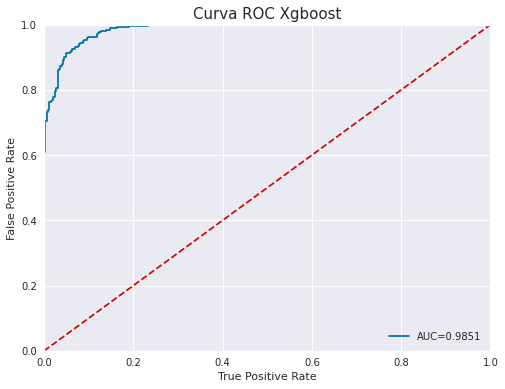

In [ ]:
plt.figure(figsize=(8,6))
probs1 = model.predict_proba(X_test)
preds1 = probs1[:, 1]
fpr1, tpr1, threshold1 = metrics.roc_curve(y_test, preds1)
roc_auc1 = metrics.auc(fpr1, tpr1)

plt.title('Curva ROC Xgboost',fontsize=15)
plt.plot(fpr1, tpr1, 'b', label='AUC=%0.4f' %roc_auc1)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('True Positive Rate', fontsize=11)
plt.ylabel('False Positive Rate', fontsize=11)
plt.grid(True)
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn import metrics 
model2 = DecisionTreeClassifier()
model2 = model2.fit(X_train,y_train)
print ('The accuracy of this model is %0.4f' %round(model2.score(X_train, y_train), 4))

The accuracy of this model is 1.0000


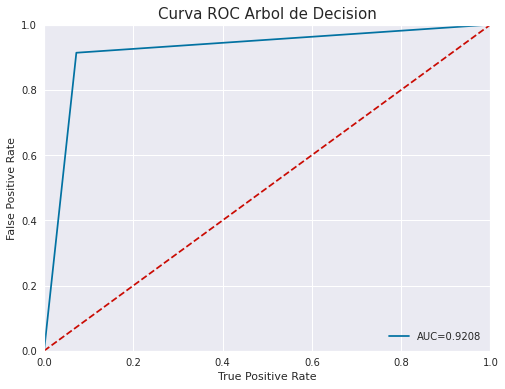

In [ ]:
plt.figure(figsize=(8,6))
probs2 = model2.predict_proba(X_test)
preds2 = probs2[:, 1]
fpr2, tpr2, threshold2 = metrics.roc_curve(y_test, preds2)
roc_auc2 = metrics.auc(fpr2, tpr2)
plt.title('Curva ROC Arbol de Decision',fontsize=15)
plt.plot(fpr2, tpr2, 'b', label='AUC=%0.4f' %roc_auc2)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('True Positive Rate', fontsize=11)
plt.ylabel('False Positive Rate', fontsize=11)
plt.grid(True)
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import learning_curve, GridSearchCV

In [ ]:
from scipy.stats import uniform
from scipy.stats import norm
from sklearn import metrics

n_estimators = np.random.uniform(100, 5000, 25).astype(int)
hyperparameters = {'n_estimators': list(n_estimators)}
print(hyperparameters)

{'n_estimators': [1378, 640, 4012, 3795, 3397, 220, 3616, 4190, 340, 893, 4984, 2482, 3613, 2044, 3940, 1435, 2895, 1953, 3109, 4483, 2702, 4409, 1237, 2815, 570]}


In [ ]:
model3 = RandomForestClassifier()
randomCV = RandomizedSearchCV(RandomForestClassifier(), 
                              param_distributions=hyperparameters,
                             n_iter = 10)
randomCV.fit(X_train, y_train);

In [ ]:
best_n_estim = randomCV.best_params_['n_estimators']

In [ ]:
model3 = RandomForestClassifier(n_estimators=best_n_estim)
model3.fit(X_train, y_train)
print ('The accuracy of this model is %0.4f' %round(model3.score(X_train, y_train), 4))

The accuracy of this model is 1.0000


In [ ]:
feature_var = pd.Series(model3.feature_importances_, index=cols).sort_values(ascending=False)
feature_var.head()

contador_pago_cero    0.493095
TRX_01_03_12          0.180979
Pago_Char_040         0.115925
TOTAL_12              0.061278
EDAD                  0.044290
dtype: float64

No handles with labels found to put in legend.


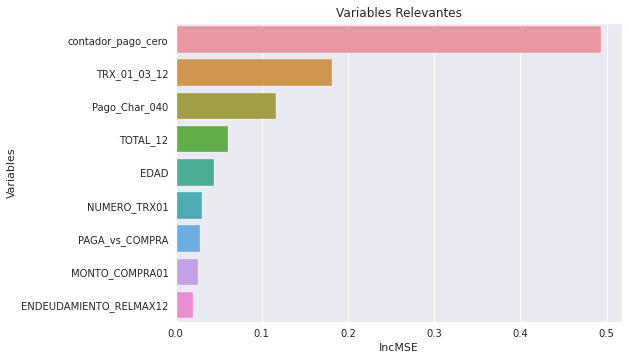

In [ ]:
sns.barplot(x=feature_var, y=feature_var.index)
plt.xlabel('IncMSE')
plt.ylabel('Variables')
plt.title("Variables Relevantes")
plt.legend()
plt.show()

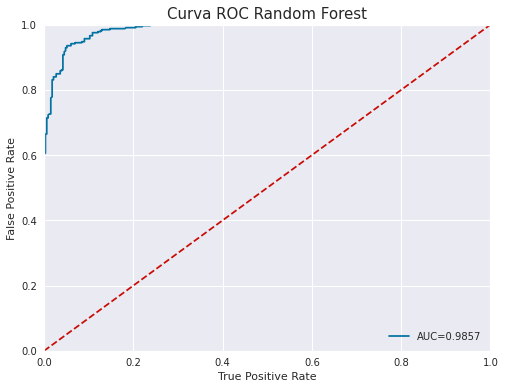

In [ ]:
plt.figure(figsize=(8,6))
probs3 = model3.predict_proba(X_test)
preds3 = probs3[:, 1]
fpr3, tpr3, threshold3 = metrics.roc_curve(y_test, preds3)
roc_auc3 = metrics.auc(fpr3, tpr3)
plt.title('Curva ROC Random Forest',fontsize=15)
plt.plot(fpr3, tpr3, 'b', label='AUC=%0.4f' %roc_auc3)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('True Positive Rate', fontsize=11)
plt.ylabel('False Positive Rate', fontsize=11)
plt.grid(True)
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import learning_curve, GridSearchCV

parameters = {
    'learning_rate': [0.05, 0.01, 0.005, 0.001] ,
    'hidden_layer_sizes': [(100,1), (100,2), (100,3)], 
    'alpha': [10.0 ** -np.arange(1, 7)],
    'activation': ["logistic", "relu", "Tanh", "Sigmoid"]}
model4 = MLPClassifier()

model4 = MLPClassifier(hidden_layer_sizes=(13,13,13),max_iter=500)
model4.fit(X_train,y_train)
print ('The accuracy of this model is %0.4f' %round(model4.score(X_train, y_train), 4))

The accuracy of this model is 0.5447


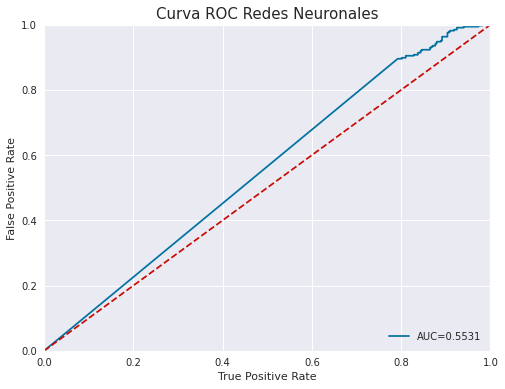

In [ ]:
plt.figure(figsize=(8,6))
probs4 = model4.predict_proba(X_test)
preds4 = probs4[:, 1]
fpr4, tpr4, threshold4 = metrics.roc_curve(y_test, preds4)
roc_auc4 = metrics.auc(fpr4, tpr4)
plt.title('Curva ROC Redes Neuronales',fontsize=15)
plt.plot(fpr4, tpr4, 'b', label='AUC=%0.4f' %roc_auc4)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('True Positive Rate', fontsize=11)
plt.ylabel('False Positive Rate', fontsize=11)
plt.grid(True)
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
model5 = LogisticRegression(solver='lbfgs')

model5.fit(X_train, y_train)
print ('The accuracy of this model is %0.4f' %round(model5.score(X_train, y_train), 4))

import statsmodels.api as sm
model = sm.Logit(y_train, X_train)
result = model.fit()
result.summary()

The accuracy of this model is 0.8315
Optimization terminated successfully.
         Current function value: 0.157176
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   flag   No. Observations:                 1531
Model:                          Logit   Df Residuals:                     1522
Method:                           MLE   Df Model:                            8
Date:                Thu, 03 Dec 2020   Pseudo R-squ.:                  0.7732
Time:                        20:22:03   Log-Likelihood:                -240.64
converged:                       True   LL-Null:                       -1061.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Pago_Char_040              0.0030      0.000      6.363      0.000       0.002       0.004
TRX_01_03_12               0.0460      0.006      7.897      0.000       0.035       0.057
ENDEUDAMIENTO_RELMAX12    -0.0194      0.005     -4.271      0.000      -0.028      -0.011
EDAD                      -0.0746      0.008     -9.300      0.000      -0.090      -0.059
TOTAL_12                  -0.0785      0.010     -7.513      0.000      -0.099      -0.058
contador_pago_cero         1.4621      0.099     14.759      0.000       1.268       1.656
PAGA_vs_COMPRA          1.221e-05   1.24e-05      0.985      0.325   -1.21e-05    3.65e-05
MONTO_COMPRA01          1.087e-07    5.6e-08      1.941      0.052   -1.04e-09    2.18e-07
NUMERO_TRX01              -0.0283      0.008     -3.415      0.001      -0.044      -0.012
==========================================================================================

Possibly complete quasi-separation: A fraction 0.13 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

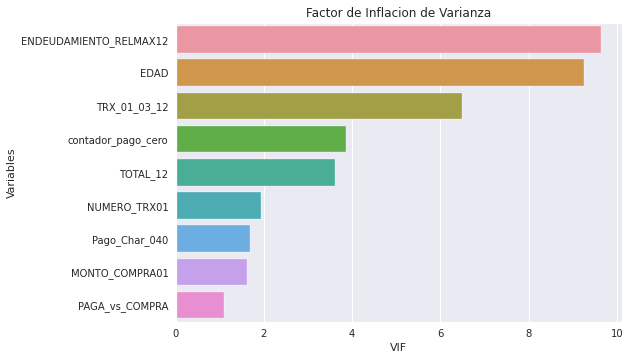

In [ ]:
vif_var = pd.Series([variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],index = X_train.columns).sort_values(ascending=False)
sns.barplot(x=vif_var, y=vif_var.index)
plt.xlabel('VIF')
plt.ylabel('Variables')
plt.title("Factor de Inflacion de Varianza")
plt.show()

In [ ]:
def ks(data=None,target=None, prob=None):
    data['target0'] = 1 - data[target]
    data['bucket'] = pd.qcut(data[prob], 10)
    grouped = data.groupby('bucket', as_index = False)
    kstable = pd.DataFrame()
    kstable['min_prob'] = grouped.min()[prob]
    kstable['max_prob'] = grouped.max()[prob]
    kstable['events']   = grouped.sum()[target]
    kstable['nonevents'] = grouped.sum()['target0']
    kstable = kstable.sort_values(by="min_prob", ascending=False).reset_index(drop = True)
    kstable['event_rate'] = (kstable.events / data[target].sum()).apply('{0:.2%}'.format)
    kstable['nonevent_rate'] = (kstable.nonevents / data['target0'].sum()).apply('{0:.2%}'.format)
    kstable['cum_eventrate']=(kstable.events / data[target].sum()).cumsum()
    kstable['cum_noneventrate']=(kstable.nonevents / data['target0'].sum()).cumsum()
    kstable['KS'] = np.round(kstable['cum_eventrate']-kstable['cum_noneventrate'], 3) * 100

    #Formating
    kstable['cum_eventrate']= kstable['cum_eventrate'].apply('{0:.2%}'.format)
    kstable['cum_noneventrate']= kstable['cum_noneventrate'].apply('{0:.2%}'.format)
    kstable.index = range(1,11)
    kstable.index.rename('Decile', inplace=True)
    pd.set_option('display.max_columns', 9)
    #print(kstable)
    
    #Display KS
    from colorama import Fore
    #print(Fore.RED + "KS is " + str(max(kstable['KS']))+"%"+ " at decile " + str((kstable.index[kstable['KS']==max(kstable['KS'])][0])))
    print('KS del Modelo es %0.4f' %max(kstable['KS']))
    return(kstable)

In [ ]:
from sklearn.metrics import roc_auc_score
from scipy.stats import ks_2samp

aucRoc = round(roc_auc_score(y_train,model5.predict_proba(X_train)[:,1]),3)
Gini   = aucRoc*2-1
print ('AUCRoc del Modelo es %0.4f' %aucRoc)
print('Gini del Modelo es %0.4f' %Gini)

AUCRoc del Modelo es 0.9100
Gini del Modelo es 0.8200


In [ ]:
df1 = pd.DataFrame(y_train.to_numpy(),columns=['y'])
df2 = pd.DataFrame(model5.predict_proba(X_train)[:,1],columns=['p'])
df1.reset_index(drop=True, inplace=True)
df2.reset_index(drop=True, inplace=True)
df = pd.concat([df1, df2],axis=1)
ks(data=df,target="y", prob="p")

KS del Modelo es 66.3000


,min_prob,max_prob,events,nonevents,event_rate,nonevent_rate,cum_eventrate,cum_noneventrate,KS
Decile,,,,,,,,,
1,0.985220,1.000000,151,2,19.64%,0.26%,19.64%,0.26%,19.4
2,0.939803,0.984791,140,13,18.21%,1.71%,37.84%,1.97%,35.9
3,0.832597,0.939719,131,22,17.04%,2.89%,54.88%,4.86%,50.0
4,0.650419,0.827367,122,31,15.86%,4.07%,70.74%,8.92%,61.8
5,0.460712,0.649517,94,59,12.22%,7.74%,82.96%,16.67%,66.3
6,0.305147,0.460064,68,85,8.84%,11.15%,91.81%,27.82%,64.0
7,0.191105,0.304001,36,117,4.68%,15.35%,96.49%,43.18%,53.3
8,0.118285,0.191075,15,138,1.95%,18.11%,98.44%,61.29%,37.2
9,0.069550,0.118120,5,148,0.65%,19.42%,99.09%,80.71%,18.4


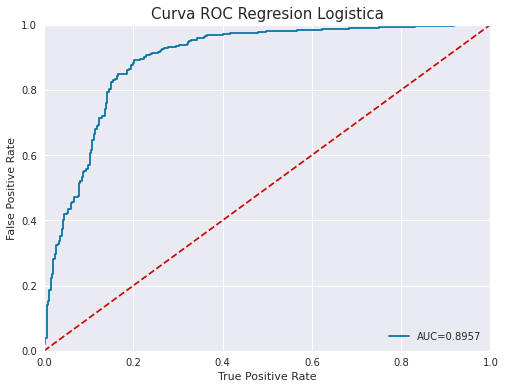

In [ ]:
plt.figure(figsize=(8,6))
probs5 = model5.predict_proba(X_test)
preds5 = probs5[:, 1]
fpr5, tpr5, threshold5 = metrics.roc_curve(y_test, preds5)
roc_auc5 = metrics.auc(fpr5, tpr5)
plt.title('Curva ROC Regresion Logistica',fontsize=15)
plt.plot(fpr5, tpr5, 'b', label='AUC=%0.4f' %roc_auc5)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('True Positive Rate', fontsize=11)
plt.ylabel('False Positive Rate', fontsize=11)
plt.grid(True)
plt.show()

The accuracy of this model is 0.5774


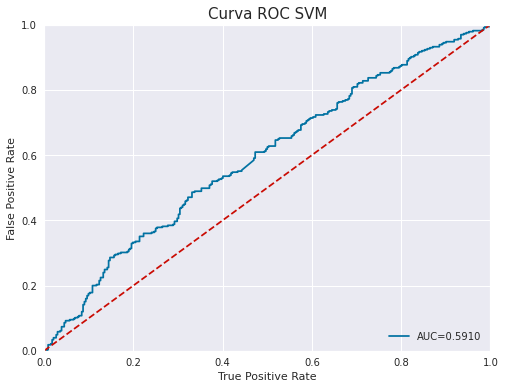

In [ ]:
from sklearn.svm import SVC
model6 = SVC(kernel="rbf",probability=True)
model6.fit(X_train, y_train)
print ('The accuracy of this model is %0.4f' %round(model6.score(X_train, y_train), 4))
probs6 = model6.predict_proba(X_test)
preds6 = probs6[:, 1]
fpr6, tpr6, threshold6 = metrics.roc_curve(y_test, preds6)
roc_auc6 = metrics.auc(fpr6, tpr6)
plt.figure(figsize=(8,6))
plt.title('Curva ROC SVM',fontsize=15)
plt.plot(fpr6, tpr6, 'b', label='AUC=%0.4f' %roc_auc6)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('True Positive Rate', fontsize=11)
plt.ylabel('False Positive Rate', fontsize=11)
plt.grid(True)
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

n_neighbors = 7
knn = KNeighborsClassifier(n_neighbors)
knn.fit(X_train,y_train)

print ('The accuracy of this model is %0.4f' %round(knn.score(X_train, y_train), 4))

The accuracy of this model is 0.6702


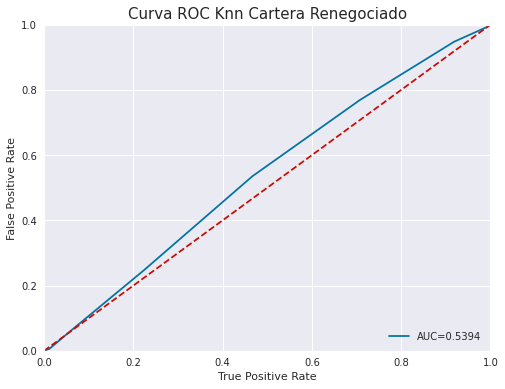

In [ ]:
plt.figure(figsize=(8,6))
probs7 = knn.predict_proba(X_test)
preds7 = probs7[:, 1]
fpr7, tpr7, threshold7 = metrics.roc_curve(y_test, preds7)
roc_auc7 = metrics.auc(fpr7, tpr7)
plt.title('Curva ROC Knn Cartera Renegociado',fontsize=15)
plt.plot(fpr7, tpr7, 'b', label='AUC=%0.4f' %roc_auc7)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('True Positive Rate', fontsize=11)
plt.ylabel('False Positive Rate', fontsize=11)
plt.grid(True)
plt.show()

In [ ]:
import lightgbm as lgb
lgb_train = lgb.Dataset(X_train, y_train)
lgb_test  = lgb.Dataset(X_test, y_test, reference=lgb_train)

In [ ]:
model8 = lgb.LGBMClassifier()
model8.fit(X_train, y_train)
print ('The accuracy of this model is %0.4f' %round(model8.score(X_train, y_train), 4))

The accuracy of this model is 1.0000


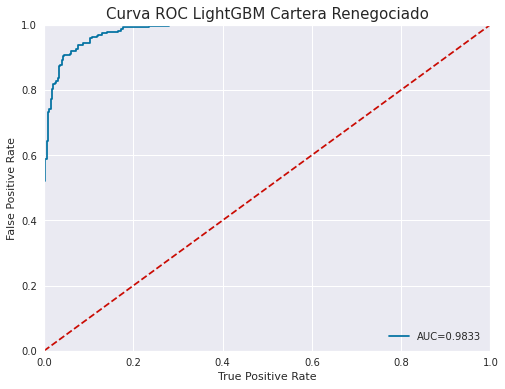

In [ ]:
plt.figure(figsize=(8,6))
probs8 = model8.predict_proba(X_test)
preds8 = probs8[:, 1]
fpr8, tpr8, threshold8 = metrics.roc_curve(y_test, preds8)
roc_auc8 = metrics.auc(fpr8, tpr8)
plt.title('Curva ROC LightGBM Cartera Renegociado',fontsize=15)
plt.plot(fpr8, tpr8, 'b', label='AUC=%0.4f' %roc_auc8)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('True Positive Rate', fontsize=11)
plt.ylabel('False Positive Rate', fontsize=11)
plt.grid(True)
plt.show()

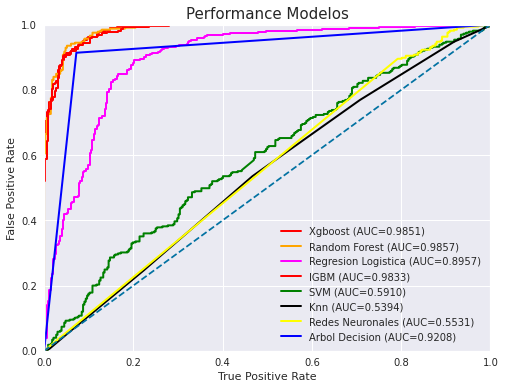

In [ ]:
plt.figure(figsize=(8,6))
## Orden de Clasificacion
plt.plot(fpr1, tpr1, color='red', lw=2, label='Xgboost (AUC=%0.4f)' %roc_auc1)
plt.plot(fpr3, tpr3, color='orange', lw=2, label='Random Forest (AUC=%0.4f)' %roc_auc3)
plt.plot(fpr5, tpr5, color='magenta', lw=2, label='Regresion Logistica (AUC=%0.4f)' %roc_auc5)
plt.plot(fpr8, tpr8, color='red', lw=2, label='lGBM (AUC=%0.4f)' %roc_auc8)
plt.plot(fpr6, tpr6, color='green', lw=2, label='SVM (AUC=%0.4f)' %roc_auc6)
plt.plot(fpr7, tpr7, color='black', lw=2, label='Knn (AUC=%0.4f)' %roc_auc7)
plt.plot(fpr4, tpr4, color='yellow', lw=2, label='Redes Neuronales (AUC=%0.4f)' %roc_auc4)
plt.plot(fpr2, tpr2, color='blue', lw=2, label='Arbol Decision (AUC=%0.4f)' %roc_auc2)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'b--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title('Performance Modelos',fontsize=15)
plt.xlabel('True Positive Rate', fontsize=11)
plt.ylabel('False Positive Rate',fontsize=11)
#plt.grid(True)
#plt.savefig('ROC_modelos.pdf', facecolor='0.95')
plt.show()